# Diamonds Linear Regression (Predict Price)


## Appendex
- Cick on the links:
    >1. <a href=#imports>Imports</a>
    >2. <a href=#loaddata>Load Data</a>
    >3. <a href=#dataformating>Data Formating</a>
    >4. <a href=#validat>Validate Assumption(Optional If exist)</a>
    >5. <a href=#Expl>Exploratory Data Analysis (Uni-Variable)</a>
    >6. <a href=#Ques> Baseline Model </a>
    >7. <a href=#Conc> Data Prep</a>
    >8. <a herf=#ff>Experimentations</a>
    

## Abstract

## Design

# Problem Description 

# <a name='imports' > Import Libraries </a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression

# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'png'




# <a name='loaddata' > Load Data </a>

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# <a name='dataformating' > Data Formating </a>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [32]:
df.shape

(53940, 11)

# Check null value 

In [6]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
sum(df.duplicated())

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
df.tail(20)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53920       53921   0.70  Very Good     E     VS2   62.4   60.0   2755  5.57   
53921       53922   0.70  Very Good     E     VS2   62.8   60.0   2755  5.59   
53922       53923   0.70  Very Good     D     VS1   63.1   59.0   2755  5.67   
53923       53924   0.73      Ideal     I     VS2   61.3   56.0   2756  5.80   
53924       53925   0.73      Ideal     I     VS2   61.6   55.0   2756  5.82   
53925       53926   0.79      Ideal     I     SI1   61.6   56.0   2756  5.95   
53926       53927   0.71      Ideal     E     SI1   61.9   56.0   2756  5.71   
53927       53928   0.79       Good     F     SI1   58.1   59.0   2756  6.06   
53928       53929   0.79    Premium     E     SI2   61.4   58.0   2756  6.03   
53929       53930   0.71      Ideal     G     VS1   61.4   56.0   2756  5.76   
53930       53931   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53931       53932   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53932       53933   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   
53933       53934   0.70  Very Good     E     VS2   61.2   59.0   2757  5.69   
53934       53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53920  5.61  3.49  
53921  5.65  3.53  
53922  5.58  3.55  
53923  5.84  3.57  
53924  5.84  3.59  
53925  5.97  3.67  
53926  5.73  3.54  
53927  6.13  3.54  
53928  5.96  3.68  
53929  5.73  3.53  
53930  5.74  3.49  
53931  5.73  3.43  
53932  5.76  3.47  
53933  5.72  3.49  
53934  5.73  3.58  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## <a name='Expl' > Exploratory Data Analysis (Uni-Variable) </a>

<AxesSubplot:>

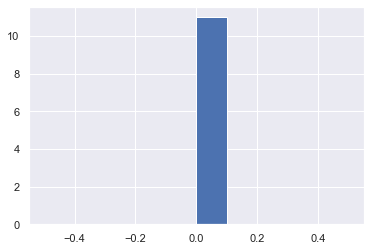

In [11]:
# To check null value 
(df.isna().sum() / len(df) * 100.00).hist()

In [12]:
# Discover outliers with Quartile calculations (IQR)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Unnamed: 0    26969.50
carat             0.64
depth             1.50
table             3.00
price          4374.25
x                 1.83
y                 1.82
z                 1.13
dtype: float64


In [14]:
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

Unnamed: 0  carat  clarity  color    cut  depth  price  table      x  \
0           False  False    False  False  False  False  False  False  False   
1           False  False    False  False  False  False  False  False  False   
2           False  False    False  False  False   True  False   True  False   
3           False  False    False  False  False  False  False  False  False   
4           False  False    False  False  False  False  False  False  False   
...           ...    ...      ...    ...    ...    ...    ...    ...    ...   
53935       False  False    False  False  False  False  False  False  False   
53936       False  False    False  False  False  False  False  False  False   
53937       False  False    False  False  False  False  False  False  False   
53938       False  False    False  False  False  False  False  False  False   
53939       False  False    False  False  False  False  False  False  False   

           y      z  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
53935  False  False  
53936  False  False  
53937  False  False  
53938  False  False  
53939  False  False  

[53940 rows x 11 columns]

<AxesSubplot:xlabel='carat'>

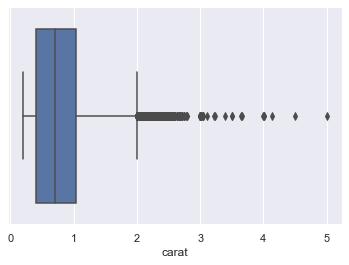

In [18]:
sns.boxplot(df['carat'])

In [19]:
 df=df[df['carat']<=20]

<AxesSubplot:xlabel='carat'>

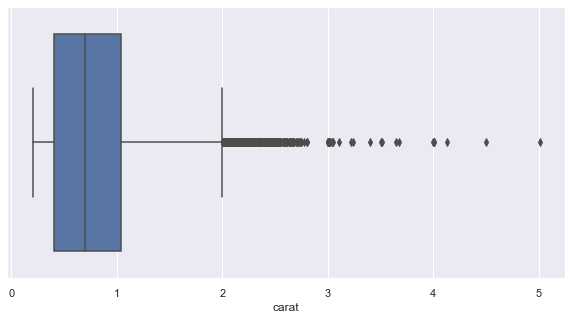

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carat', data= df)

## <a name='Ques' > Baseline Model </a>

## <a name='Ques' > Data Prep </a>

## <a name='Ques' > Experimentations </a>